In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
FullText_Scrapes_df = pd.read_csv('FullTextscrapes.csv')

In [16]:
# Drop the unwanted columns and keep only rows where Full_Text is not NaN (not null)
df_filtered = FullText_Scrapes_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'DOI']).dropna(subset=['Full_Text'])
df_filtered

,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Mentions_Accuracy,...,Mentions_T-test,Mentions_Anova,Mentions_Correlation,Mentions_Regression,Mentions_Baseline_comparison,Mentions_Mae,Mentions_Rmse,Mentions_Bias,Base_Domain,Full_Text
6,A deep learning perspective on the origin of f...,"['R Breuer', 'R Kimmel']",2017,140,"Acted Facial Expressions In The Wild, Extended...","CNN, FER, deep learning, machine learning",We verify our findings on the Extended Cohn-Ka...,arXiv preprint arXiv:1705.01842,https://arxiv.org/abs/1705.01842,False,...,False,False,False,False,False,False,False,False,arxiv.org,"BREUER,KIMMEL:ADEEPLEARNINGPERSPECTIVEONFACIAL..."
7,A deeper look at facial expression dataset bias,"['S Li', 'W Deng']",2020,127,"Affective Faces Database, MMI Facial Expression","FER, classification, classifier",As the skew class distribution across domains ...,IEEE Transactions on Affective Computing,https://arxiv.org/abs/1904.11150,False,...,False,False,False,False,False,False,False,False,arxiv.org,1\nA Deeper Look at Facial Expression Dataset ...
24,Aff-wild2: Extending the aff-wild database for...,"['D Kollias', 'S Zafeiriou']",2018,167,Affective Faces Database,"CNN, deep learning, neural network",the paper is that by training deep neural netw...,arXiv preprint arXiv:1811.07770,https://arxiv.org/abs/1811.07770,False,...,False,False,False,False,False,False,False,False,arxiv.org,Aff-Wild2: Extending the Aff-Wild Database for...
26,"Affect analysis in-the-wild: Valence-arousal, ...","['D Kollias', 'S Zafeiriou']",2021,206,Expression in-the-Wild,"classification, deep learning",databases and ii) design and training of novel...,arXiv preprint arXiv:2103.15792,https://arxiv.org/abs/2103.15792,False,...,False,False,False,False,False,False,False,False,arxiv.org,1\nAffect Analysis in-the-wild: Valence-Arousa...
29,"Affectnet: A database for facial expression, v...","['A Mollahosseini', 'B Hasani']",2017,1965,"Acted Facial Expressions In The Wild, Affectiv...","CNN, FER, classification, classifier, deep lea...",our deep neural network baselines can perform ...,IEEE Transactions on …,https://arxiv.org/abs/1708.03985,False,...,False,False,False,False,False,False,False,False,arxiv.org,IEEETRANSACTIONSONAFFECTIVECOMPUTING 1\nAffect...
51,Covariance pooling for facial expression recog...,"['D Acharya', 'Z Huang', 'D Pani Paudel']",2018,216,"Affective Faces Database, Static Facial Expres...",facial expression recognition,methods on riemannian manifold for emotion rec...,… pattern recognition …,https://arxiv.org/abs/1805.04855,False,...,False,False,False,False,False,False,False,False,arxiv.org,Covariance Pooling for Facial Expression Recog...
53,Deep affect prediction in-the-wild: Aff-wild d...,"['D Kollias', 'P Tzirakis', 'MA Nicolaou']",2019,440,"Affective Faces Database, Expression in-the-Wild","CNN, classification, deep learning, machine le...",", we show that our network can be also used fo...",International Journal of …,https://arxiv.org/abs/1804.10938,False,...,False,False,False,False,False,False,False,False,arxiv.org,InternationalJournalofComputerVision-SpecialIs...
55,Deep facial expression recognition: A survey,"['S Li', 'W Deng']",2020,1828,"Acted Facial Expressions In The Wild, Affectiv...","FER, deep learning, facial expression recognit...",definition of facial expressions. In this surv...,IEEE transactions on affective computing,https://arxiv.org/abs/1804.08348,False,...,False,False,False,False,False,False,False,False,arxiv.org,1\nDeep Facial Expression Recognition: A Surve...
56,Deep imbalanced learning for face recognition ...,"['C Huang', 'Y Li', 'CC Loy', 'X Tang']",2019,390,Toronto Face Database,"deep learning, machine learning","To mitigate this issue, contemporary deep lear...",… pattern analysis and machine …,https://arxiv.org/abs/1806.00194,False,...,False,False,False,False,False,False,False,False,arxiv.org,1\nDeep Imbalanced Learning for Face Recogniti...
62,Deep learning for human affect r

In [12]:
# Define the keywords to search for in the Full_Text for each mention column
mention_keywords = {
    'Mentions_Accuracy': 'accuracy',
    'Mentions_F1': 'f1',
    'Mentions_Precision': 'precision',
    'Mentions_Recall': 'recall',
    'Mentions_Auc': 'auc',
    'Mentions_Roc': 'roc',
    'Mentions_Sensitivity': 'sensitivity',
    'Mentions_Specificity': 'specificity',
    'Mentions_Confusion_matrix': 'confusion matrix',
    'Mentions_Loss_function': 'loss function',
    'Mentions_Cross-entropy': 'cross-entropy',
    'Mentions_Mean_squared_error': 'mean squared error',
    'Mentions_Overfitting': 'overfitting',
    'Mentions_Underfitting': 'underfitting',
    'Mentions_Cross-validation': 'cross-validation',
    'Mentions_Training_time': 'training time',
    'Mentions_Inference_time': 'inference time',
    'Mentions_Statistical_significance': 'statistical significance',
    'Mentions_P-value': 'p-value',
    'Mentions_T-test': 't-test',
    'Mentions_Anova': 'anova',
    'Mentions_Correlation': 'correlation',
    'Mentions_Regression': 'regression',
    'Mentions_Baseline_comparison': 'baseline comparison',
    'Mentions_Mae': 'mae',
    'Mentions_Rmse': 'rmse',
    'Mentions_Bias': 'bias'
}


# Loop through each mention column and check if the keyword is in the Full_Text
for mention_column, keyword in mention_keywords.items():
    # If keyword is found in Full_Text, set the corresponding mention column to True
    df_filtered[mention_column] = df_filtered.apply(
        lambda row: True if keyword.lower() in row['Full_Text'].lower() else row[mention_column], axis=1
    )
df_filtered

,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Mentions_Accuracy,...,Mentions_T-test,Mentions_Anova,Mentions_Correlation,Mentions_Regression,Mentions_Baseline_comparison,Mentions_Mae,Mentions_Rmse,Mentions_Bias,Base_Domain,Full_Text
6,A deep learning perspective on the origin of f...,"['R Breuer', 'R Kimmel']",2017,140,"Acted Facial Expressions In The Wild, Extended...","CNN, FER, deep learning, machine learning",We verify our findings on the Extended Cohn-Ka...,arXiv preprint arXiv:1705.01842,https://arxiv.org/abs/1705.01842,True,...,False,False,True,False,False,True,False,True,arxiv.org,"BREUER,KIMMEL:ADEEPLEARNINGPERSPECTIVEONFACIAL..."
7,A deeper look at facial expression dataset bias,"['S Li', 'W Deng']",2020,127,"Affective Faces Database, MMI Facial Expression","FER, classification, classifier",As the skew class distribution across domains ...,IEEE Transactions on Affective Computing,https://arxiv.org/abs/1904.11150,True,...,False,False,False,True,False,False,False,True,arxiv.org,1\nA Deeper Look at Facial Expression Dataset ...
24,Aff-wild2: Extending the aff-wild database for...,"['D Kollias', 'S Zafeiriou']",2018,167,Affective Faces Database,"CNN, deep learning, neural network",the paper is that by training deep neural netw...,arXiv preprint arXiv:1811.07770,https://arxiv.org/abs/1811.07770,False,...,False,False,True,False,False,False,False,False,arxiv.org,Aff-Wild2: Extending the Aff-Wild Database for...
26,"Affect analysis in-the-wild: Valence-arousal, ...","['D Kollias', 'S Zafeiriou']",2021,206,Expression in-the-Wild,"classification, deep learning",databases and ii) design and training of novel...,arXiv preprint arXiv:2103.15792,https://arxiv.org/abs/2103.15792,True,...,False,False,True,True,False,False,False,True,arxiv.org,1\nAffect Analysis in-the-wild: Valence-Arousa...
29,"Affectnet: A database for facial expression, v...","['A Mollahosseini', 'B Hasani']",2017,1965,"Acted Facial Expressions In The Wild, Affectiv...","CNN, FER, classification, classifier, deep lea...",our deep neural network baselines can perform ...,IEEE Transactions on …,https://arxiv.org/abs/1708.03985,True,...,False,False,True,True,False,True,True,True,arxiv.org,IEEETRANSACTIONSONAFFECTIVECOMPUTING 1\nAffect...
51,Covariance pooling for facial expression recog...,"['D Acharya', 'Z Huang', 'D Pani Paudel']",2018,216,"Affective Faces Database, Static Facial Expres...",facial expression recognition,methods on riemannian manifold for emotion rec...,… pattern recognition …,https://arxiv.org/abs/1805.04855,True,...,False,False,False,True,False,False,False,False,arxiv.org,Covariance Pooling for Facial Expression Recog...
53,Deep affect prediction in-the-wild: Aff-wild d...,"['D Kollias', 'P Tzirakis', 'MA Nicolaou']",2019,440,"Affective Faces Database, Expression in-the-Wild","CNN, classification, deep learning, machine le...",", we show that our network can be also used fo...",International Journal of …,https://arxiv.org/abs/1804.10938,True,...,False,False,True,True,False,True,True,False,arxiv.org,InternationalJournalofComputerVision-SpecialIs...
55,Deep facial expression recognition: A survey,"['S Li', 'W Deng']",2020,1828,"Acted Facial Expressions In The Wild, Affectiv...","FER, deep learning, facial expression recognit...",definition of facial expressions. In this surv...,IEEE transactions on affective computing,https://arxiv.org/abs/1804.08348,True,...,False,False,True,True,False,False,False,True,arxiv.org,1\nDeep Facial Expression Recognition: A Surve...
56,Deep imbalanced learning for face recognition ...,"['C Huang', 'Y Li', 'CC Loy', 'X Tang']",2019,390,Toronto Face Database,"deep learning, machine learning","To mitigate this issue, contemporary deep lear...",… pattern analysis and machine …,https://arxiv.org/abs/1806.00194,True,...,False,False,False,False,False,False,False,True,arxiv.org,1\nDeep Imbalanced Learning for Face Recogniti...
62,Deep learning for human affect recognition: In...,"['PV Rouast'

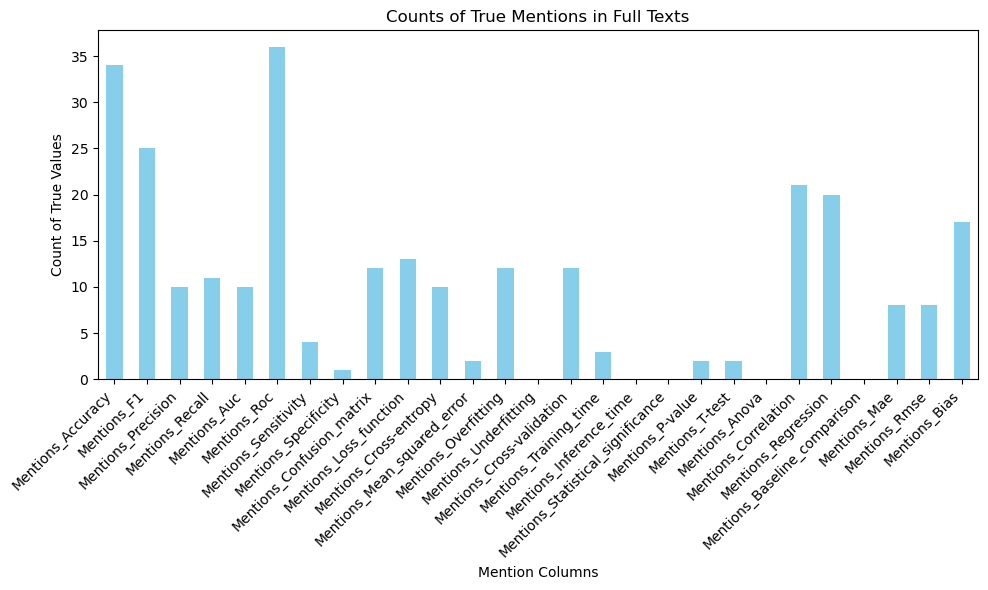

In [13]:
# Define the mention columns we are interested in
mention_columns = [
    'Mentions_Accuracy',
       'Mentions_F1', 'Mentions_Precision', 'Mentions_Recall', 'Mentions_Auc',
       'Mentions_Roc', 'Mentions_Sensitivity', 'Mentions_Specificity',
       'Mentions_Confusion_matrix', 'Mentions_Loss_function',
       'Mentions_Cross-entropy', 'Mentions_Mean_squared_error',
       'Mentions_Overfitting', 'Mentions_Underfitting',
       'Mentions_Cross-validation', 'Mentions_Training_time',
       'Mentions_Inference_time', 'Mentions_Statistical_significance',
       'Mentions_P-value', 'Mentions_T-test', 'Mentions_Anova',
       'Mentions_Correlation', 'Mentions_Regression',
       'Mentions_Baseline_comparison', 'Mentions_Mae', 'Mentions_Rmse',
       'Mentions_Bias'
]

# Count the number of True values in each mention column
true_counts = df_filtered[mention_columns].sum()

# Plot the results
plt.figure(figsize=(10, 6))
true_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of True Mentions in Full Texts')
plt.xlabel('Mention Columns')
plt.ylabel('Count of True Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
import re

# Function to extract metrics like accuracy, precision, etc. from text
def extract_results(text, keyword):
    # Look for keyword followed by percentage or decimal values
    pattern = rf'{keyword}\s*[\:=]?\s*(\d+(\.\d+)?%?)'
    matches = re.findall(pattern, text, re.IGNORECASE)
    return matches

# Add a column to store extracted results
df_filtered['Extracted_Results'] = ''

# Loop over each row and extract results based on the mention columns
for index, row in df_filtered.iterrows():
    full_text = row['Full_Text']
    extracted_results = []
    
    # Check each mention column that has a True value and extract the results
    for mention_column, keyword in mention_keywords.items():
        if row[mention_column]:  # If mention column is True
            results = extract_results(full_text, keyword)
            if results:
                extracted_results.append(f'{keyword.capitalize()}: {", ".join([r[0] for r in results])}')
    
    # Combine and store the extracted results
    df_filtered.at[index, 'Extracted_Results'] = '; '.join(extracted_results)

df_filtered

,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Mentions_Accuracy,...,Mentions_Anova,Mentions_Correlation,Mentions_Regression,Mentions_Baseline_comparison,Mentions_Mae,Mentions_Rmse,Mentions_Bias,Base_Domain,Full_Text,Extracted_Results
6,A deep learning perspective on the origin of f...,"['R Breuer', 'R Kimmel']",2017,140,"Acted Facial Expressions In The Wild, Extended...","CNN, FER, deep learning, machine learning",We verify our findings on the Extended Cohn-Ka...,arXiv preprint arXiv:1705.01842,https://arxiv.org/abs/1705.01842,False,...,False,False,False,False,False,False,False,arxiv.org,"BREUER,KIMMEL:ADEEPLEARNINGPERSPECTIVEONFACIAL...",
7,A deeper look at facial expression dataset bias,"['S Li', 'W Deng']",2020,127,"Affective Faces Database, MMI Facial Expression","FER, classification, classifier",As the skew class distribution across domains ...,IEEE Transactions on Affective Computing,https://arxiv.org/abs/1904.11150,False,...,False,False,False,False,False,False,False,arxiv.org,1\nA Deeper Look at Facial Expression Dataset ...,
24,Aff-wild2: Extending the aff-wild database for...,"['D Kollias', 'S Zafeiriou']",2018,167,Affective Faces Database,"CNN, deep learning, neural network",the paper is that by training deep neural netw...,arXiv preprint arXiv:1811.07770,https://arxiv.org/abs/1811.07770,False,...,False,False,False,False,False,False,False,arxiv.org,Aff-Wild2: Extending the Aff-Wild Database for...,
26,"Affect analysis in-the-wild: Valence-arousal, ...","['D Kollias', 'S Zafeiriou']",2021,206,Expression in-the-Wild,"classification, deep learning",databases and ii) design and training of novel...,arXiv preprint arXiv:2103.15792,https://arxiv.org/abs/2103.15792,False,...,False,False,False,False,False,False,False,arxiv.org,1\nAffect Analysis in-the-wild: Valence-Arousa...,
29,"Affectnet: A database for facial expression, v...","['A Mollahosseini', 'B Hasani']",2017,1965,"Acted Facial Expressions In The Wild, Affectiv...","CNN, FER, classification, classifier, deep lea...",our deep neural network baselines can perform ...,IEEE Transactions on …,https://arxiv.org/abs/1708.03985,False,...,False,False,False,False,False,False,False,arxiv.org,IEEETRANSACTIONSONAFFECTIVECOMPUTING 1\nAffect...,
51,Covariance pooling for facial expression recog...,"['D Acharya', 'Z Huang', 'D Pani Paudel']",2018,216,"Affective Faces Database, Static Facial Expres...",facial expression recognition,methods on riemannian manifold for emotion rec...,… pattern recognition …,https://arxiv.org/abs/1805.04855,False,...,False,False,False,False,False,False,False,arxiv.org,Covariance Pooling for Facial Expression Recog...,
53,Deep affect prediction in-the-wild: Aff-wild d...,"['D Kollias', 'P Tzirakis', 'MA Nicolaou']",2019,440,"Affective Faces Database, Expression in-the-Wild","CNN, classification, deep learning, machine le...",", we show that our network can be also used fo...",International Journal of …,https://arxiv.org/abs/1804.10938,False,...,False,False,False,False,False,False,False,arxiv.org,InternationalJournalofComputerVision-SpecialIs...,
55,Deep facial expression recognition: A survey,"['S Li', 'W Deng']",2020,1828,"Acted Facial Expressions In The Wild, Affectiv...","FER, deep learning, facial expression recognit...",definition of facial expressions. In this surv...,IEEE transactions on affective computing,https://arxiv.org/abs/1804.08348,False,...,False,False,False,False,False,False,False,arxiv.org,1\nDeep Facial Expression Recognition: A Surve...,
56,Deep imbalanced learning for face recognition ...,"['C Huang', 'Y Li', 'CC Loy', 'X Tang']",2019,390,Toronto Face Database,"deep learning, machine learning","To mitigate this issue, contemporary deep lear...",… pattern analysis and machine …,https://arxiv.org/abs/1806.00194,False,...,False,False,False,False,False,False,False,arxiv.org,1\nDeep Imbalanced Learning for Face Recogniti...,
62,Deep learning for human affect recognition: In...,"['PV Rouast', 'MTP Adam'

In [19]:
import re

# Function to extract tables from text
def extract_tables(text):
    # Regular expression to find tables and their data
    table_pattern = r'(Table\s*\d+.*?)((?:\n.*?)+?\n)'
    
    # Find all potential tables in the text
    tables = re.findall(table_pattern, text, re.IGNORECASE | re.DOTALL)
    
    # Clean and return the extracted tables
    extracted_tables = []
    for heading, table_data in tables:
        # Strip and clean up the table data
        clean_table_data = table_data.strip()
        extracted_tables.append(f'{heading}\n{clean_table_data}')
    
    return extracted_tables

# Add a column to store extracted tables
df_filtered['Extracted_Tables'] = ''

# Loop over each row and extract tables from Full_Text
for index, row in df_filtered.iterrows():
    full_text = row['Full_Text']
    tables = extract_tables(full_text)
    
    # Store the extracted tables in the new column
    df_filtered.at[index, 'Extracted_Tables'] = '\n\n'.join(tables) if tables else 'No tables found'

df_filtered


,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Mentions_Accuracy,...,Mentions_Correlation,Mentions_Regression,Mentions_Baseline_comparison,Mentions_Mae,Mentions_Rmse,Mentions_Bias,Base_Domain,Full_Text,Extracted_Results,Extracted_Tables
6,A deep learning perspective on the origin of f...,"['R Breuer', 'R Kimmel']",2017,140,"Acted Facial Expressions In The Wild, Extended...","CNN, FER, deep learning, machine learning",We verify our findings on the Extended Cohn-Ka...,arXiv preprint arXiv:1705.01842,https://arxiv.org/abs/1705.01842,False,...,False,False,False,False,False,False,arxiv.org,"BREUER,KIMMEL:ADEEPLEARNINGPERSPECTIVEONFACIAL...",,Table 2: Accuracy evaluation of\nTable 1: Accu...
7,A deeper look at facial expression dataset bias,"['S Li', 'W Deng']",2020,127,"Affective Faces Database, MMI Facial Expression","FER, classification, classifier",As the skew class distribution across domains ...,IEEE Transactions on Affective Computing,https://arxiv.org/abs/1904.11150,False,...,False,False,False,False,False,False,arxiv.org,1\nA Deeper Look at Facial Expression Dataset ...,,No tables found
24,Aff-wild2: Extending the aff-wild database for...,"['D Kollias', 'S Zafeiriou']",2018,167,Affective Faces Database,"CNN, deep learning, neural network",the paper is that by training deep neural netw...,arXiv preprint arXiv:1811.07770,https://arxiv.org/abs/1811.07770,False,...,False,False,False,False,False,False,arxiv.org,Aff-Wild2: Extending the Aff-Wild Database for...,,No tables found
26,"Affect analysis in-the-wild: Valence-arousal, ...","['D Kollias', 'S Zafeiriou']",2021,206,Expression in-the-Wild,"classification, deep learning",databases and ii) design and training of novel...,arXiv preprint arXiv:2103.15792,https://arxiv.org/abs/2103.15792,False,...,False,False,False,False,False,False,arxiv.org,1\nAffect Analysis in-the-wild: Valence-Arousa...,,No tables found
29,"Affectnet: A database for facial expression, v...","['A Mollahosseini', 'B Hasani']",2017,1965,"Acted Facial Expressions In The Wild, Affectiv...","CNN, FER, classification, classifier, deep lea...",our deep neural network baselines can perform ...,IEEE Transactions on …,https://arxiv.org/abs/1708.03985,False,...,False,False,False,False,False,False,arxiv.org,IEEETRANSACTIONSONAFFECTIVECOMPUTING 1\nAffect...,,TABLE1\nTheSummaryandCharacteristicsofReviewed...
51,Covariance pooling for facial expression recog...,"['D Acharya', 'Z Huang', 'D Pani Paudel']",2018,216,"Affective Faces Database, Static Facial Expres...",facial expression recognition,methods on riemannian manifold for emotion rec...,… pattern recognition …,https://arxiv.org/abs/1805.04855,False,...,False,False,False,False,False,False,arxiv.org,Covariance Pooling for Facial Expression Recog...,,Table2.\n(Finetuned)‡\n\nTable1.Comparisonofim...
53,Deep affect prediction in-the-wild: Aff-wild d...,"['D Kollias', 'P Tzirakis', 'MA Nicolaou']",2019,440,"Affective Faces Database, Expression in-the-Wild","CNN, classification, deep learning, machine le...",", we show that our network can be also used fo...",International Journal of …,https://arxiv.org/abs/1804.10938,False,...,False,False,False,False,False,False,arxiv.org,InternationalJournalofComputerVision-SpecialIs...,,Table1:\nresearch in psychology. The most freq...
55,Deep facial expression recognition: A survey,"['S Li', 'W Deng']",2020,1828,"Acted Facial Expressions In The Wild, Affectiv...","FER, deep learning, facial expression recognit...",definition of facial expressions. In this surv...,IEEE transactions on affective computing,https://arxiv.org/abs/1804.08348,False,...,False,False,False,False,False,False,arxiv.org,1\nDeep Facial Expression Recognition: A Surve...,,Table 1 provides an overview of these (AFEW) d...
56,Deep imbalanced learning for face recognition ...,"['C Huang', 'Y Li', 'CC Loy', 'X Tang']",2019,390,Toronto Face Database,"deep learning, machine learning","To mitigate this issue, contemporary deep lear...",… pat

No tables found on page 1
No tables found on page 2
Tables from page 3 of pdfs\arxiv_paper_100.pdf:
     Emotion Protot.AUs         Observ.AUs(withweightsw)
0  happiness      12,25                          6(0.51)
1    sadness       4,15  1(0.6),6(0.5),11(0.26),17(0.67)
2       fear  1,4,20,25         2(0.57),5(0.63),26(0.33)
3      anger     4,7,24       10(0.26),17(0.52),23(0.29)
4   surprise  1,2,25,26                          5(0.66)
5   disguste    9,10,17                 4(0.31),24(0.26)


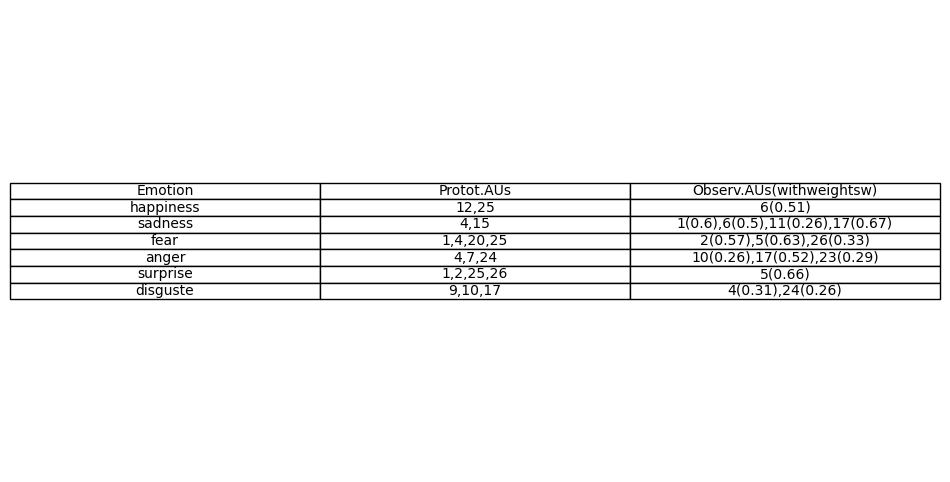

No tables found on page 4
No tables found on page 5
No tables found on page 6
Tables from page 7 of pdfs\arxiv_paper_100.pdf:
                              Databases Relatedness Aff-Wild   None AffectNet  \
0                       FaceBehaviorNet                CCC-V  CCC-A     CCC-V   
1                        nocouplingloss           -     0.55   0.36      0.56   
2                         co-annotation        [12]     0.56   0.38      0.56   
3                     softco-annotation        [12]     0.56   0.39      0.57   
4                        distr-matching        [12]     0.56   0.37      0.57   
5  softco-annotation\nanddistr-matching        [12]     0.59   0.41      0.59   
6                         co-annotation   Aff-Wild2     0.55   0.37      0.56   
7                     softco-annotation   Aff-Wild2     0.56   0.37      0.57   
8                        distr-matching   Aff-Wild2     0.57   0.39      0.60   
9  softco-annotation\nanddistr-matching   Aff-Wild2     0.60   0

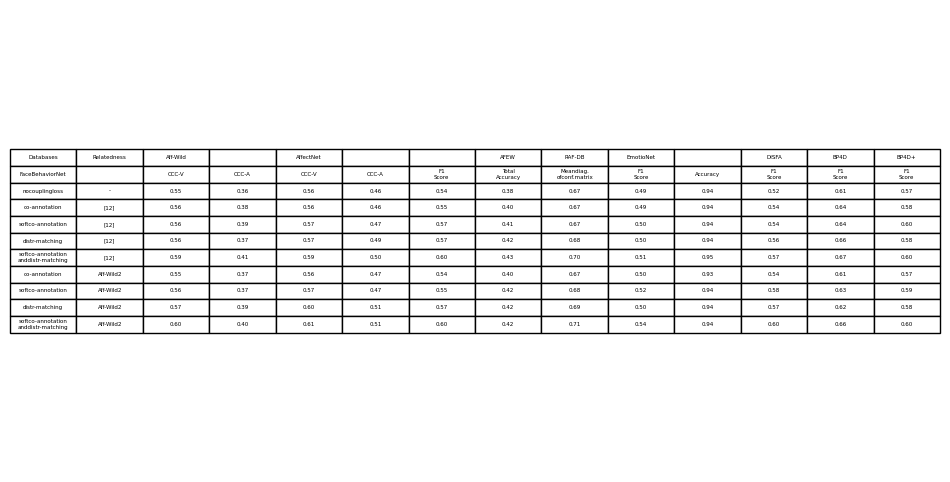

     Emotion                                 AUs(withweightsw)
0      happy         12(0.82),25(0.7),6(0.57),7(0.83),10(0.63)
1        sad          4(0.53),15(0.42),1(0.31),7(0.13),17(0.1)
2    fearful  1(0.52),4(0.4),25(0.85),5(0.38),7(0.57),10(0.57)
3      angry          4(0.65),7(0.45),25(0.4),10(0.33),9(0.15)
4  surprised    1(0.38),2(0.37),25(0.85),26(0.3),5(0.5),7(0.2)
5  disgusted  9(0.21),10(0.85),17(0.23),4(0.6),7(0.75),25(0.8)


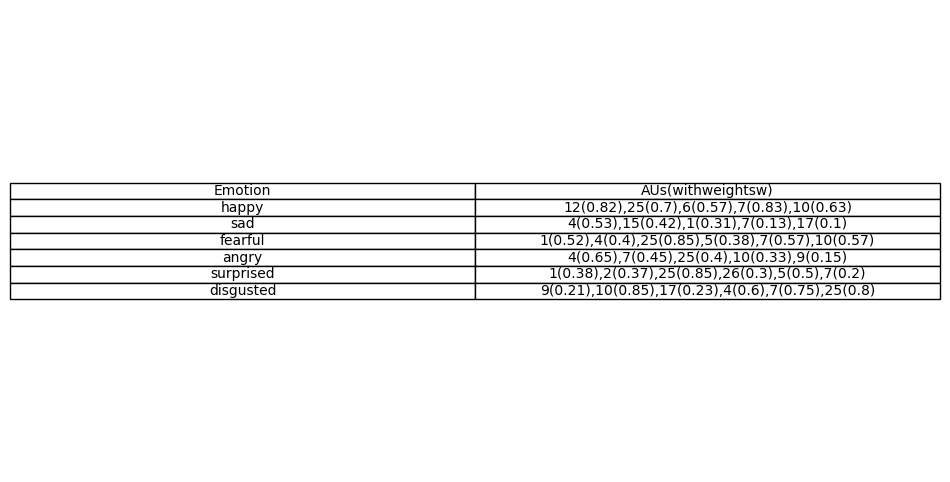

Tables from page 8 of pdfs\arxiv_paper_100.pdf:
                                            Databases Aff-Wild   None  \
0                                                        CCC-V  CCC-A   
1                           bestperformingCNN[21][23]     0.51   0.33   
2                                      FATAUVA-Net[6]     0.40   0.28   
3                                     (2×)AlexNet[30]        -      -   
4                                    non-linearSVM[9]        -      -   
5                                   VGG-FACE-mSVM[27]        -      -   
6                                          AlexNet[4]        -      -   
7                                       ResNet-34[11]        -      -   
8                                    DLEextension[45]        -      -   
9                                                [36]        -      -   
10                            (3×)VGG-FACEsingle-task     0.52   0.31   
11                     FaceBehaviorNet,nocouplingloss     0.55   0.36   
12 

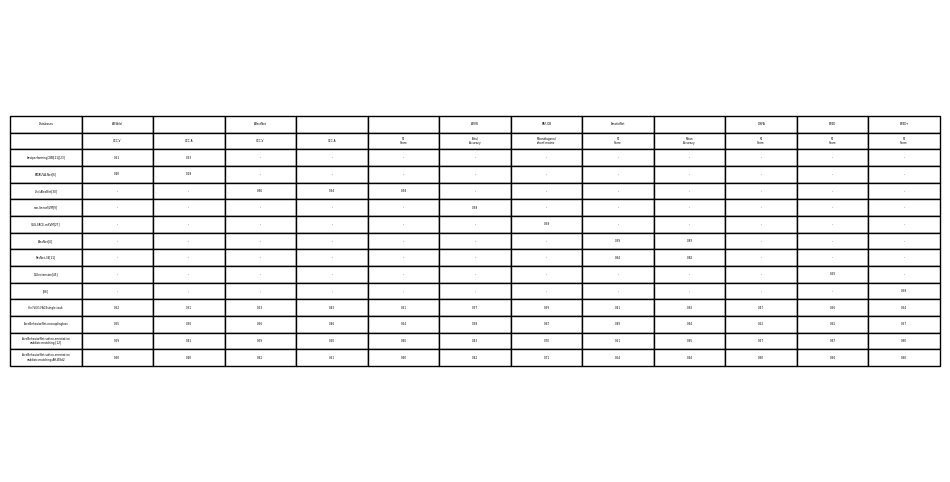

Tables from page 9 of pdfs\arxiv_paper_100.pdf:
                                      Databases  EmotioNet  \
0                                       Methods  F1\nScore   
1      zero-shot,FaceBehaviorNet,nocouplingloss      0.243   
2  zero-shot,FaceBehaviorNet,bothcouplinglosses      0.312   
3                                   NTechLab[4]      0.255   
4                             VGG-FACE-mSVM[27]          -   
5                                   DLP-CNN[27]          -   
6      fine-tunedFaceBehaviorNet,nocouplingloss          -   
7  fine-tunedFaceBehaviorNet,bothcouplinglosses          -   

                        None                       RAF-DB  
0  Unweighted\nAverageRecall  Meandiagonal\nofconf.matrix  
1                      0.260                        0.342  
2                      0.329                        0.364  
3                      0.243                            -  
4                          -                        0.316  
5                          -     

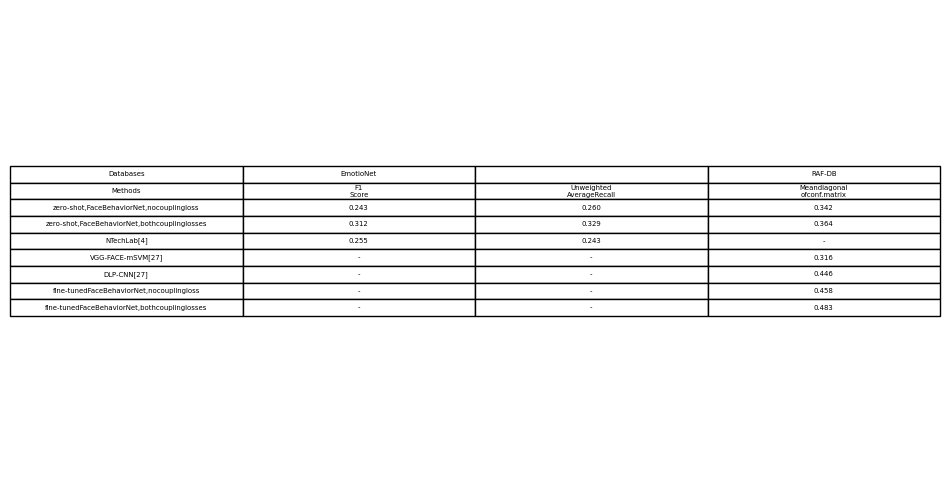

No tables found on page 10
No tables found on page 11
No tables found on page 1
No tables found on page 2
No tables found on page 3
Tables from page 4 of pdfs\arxiv_paper_106.pdf:
                                             Model       Pool4       Pool5  \
0                  Pre-trained(CK)\nFine-tuned(CK)   7763\n-57  2011\n+511   
1  Pre-trained(Oulu-CASIA)\nFine-tuned(Oulu-CASIA)  3009\n+194   605\n+895   

         FC6        FC7  
0  338\n+658  248\n+610  
1   48\n+952  33\n+1086  


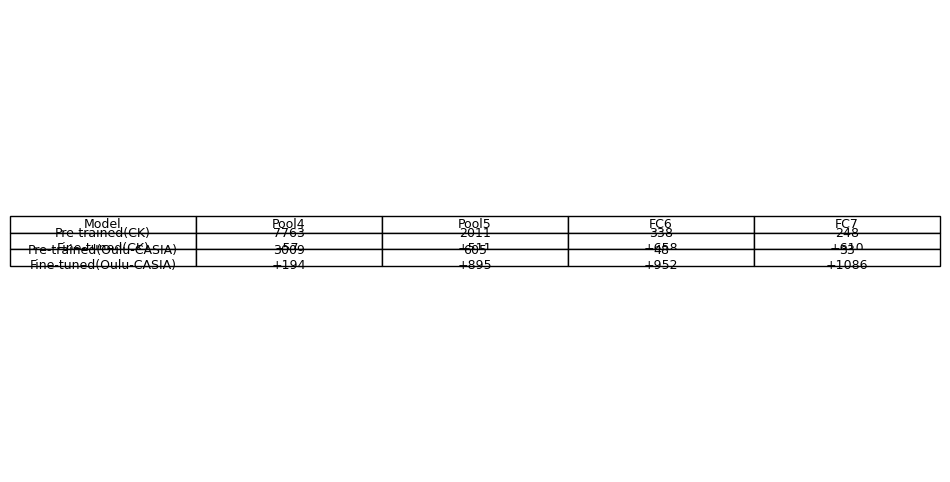

                               \
0  CK+\nOulu-CASIA\nTFD\nSFEW   

                             An Co Di Fe Ha Sa Su Ne                   Total  
0  135 54 177 75 147 84 249 327\n240 240 240 240 ...  1308\n1444\n4178\n1322  


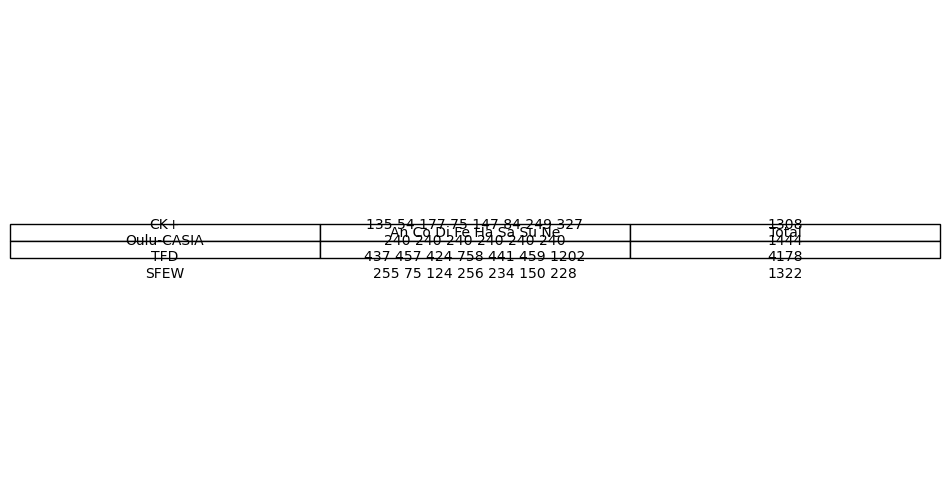

Tables from page 5 of pdfs\arxiv_paper_106.pdf:
                                              Method  \
0  CSPL[16]\nAdaGabor[35]\nLBPSVM[36]\n3DCNN-DAP[...   
1  AUDN[18]\nTrainFromScratch(BN)\nVGGFine-Tune(b...   

                                     AverageAccuracy  #Exp.Classes  
0  89.9%\n93.3%\n95.1%\n92.4%\n96.7%\n94.2%\n97.3...    SixClasses  
1                         92.1%\n88.7%\n89.9%\n96.8%  EightClasses  


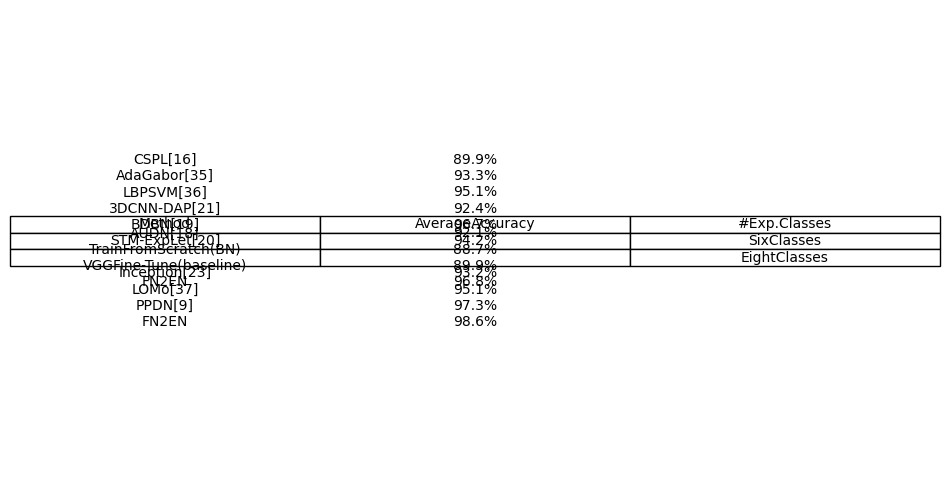

Tables from page 6 of pdfs\arxiv_paper_106.pdf:
                                              Method  \
0  HOG3D[38]\nAdaLBP[28]\nAtlases[39]\nSTM-ExpLet...   
1                                              FN2EN   

                                     AverageAccuracy  
0  70.63%\n73.54%\n75.52%\n74.59%\n81.46%\n82.10%...  
1                                             87.71%  


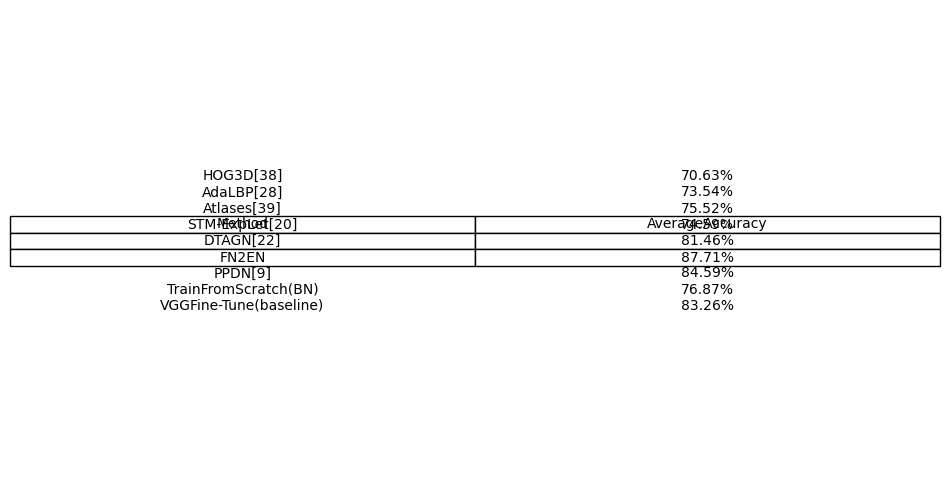

                                              Method  \
0  Gabor+PCA[40]\nDeepmPoT[41]\nCDA+CCA[42]\ndisR...   
1                                              FN2EN   

                                   AverageAccuracy  
0  80.2%\n82.4%\n85.0%\n85.4%\n86.8%\n82.5%\n86.7%  
1                                            88.9%  


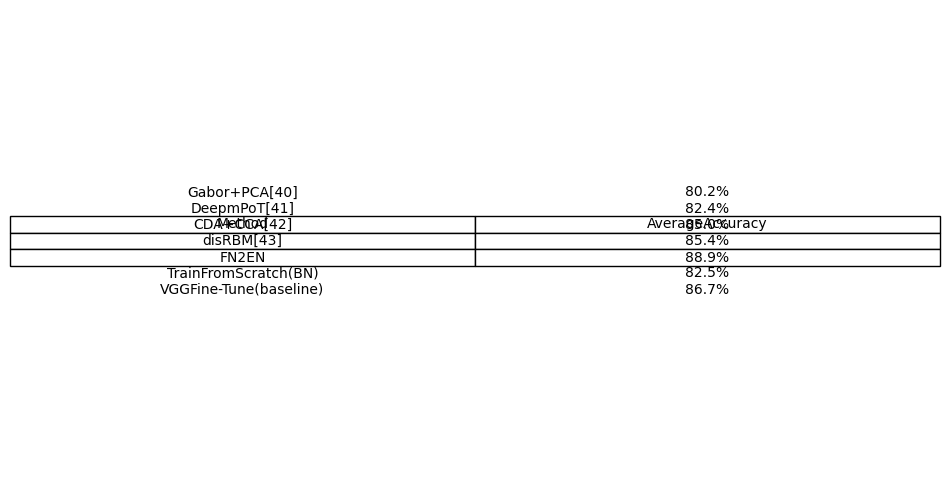

Tables from page 7 of pdfs\arxiv_paper_106.pdf:
                                              Method  \
0  AUDN[18]\nSTM-ExpLet[20]\nInception[23]\nMappe...   
1  TransferLearning[25]\nMultipleDeepNetwork[24]\...   

                                     AverageAccuracy ExtraTrainData  
0  26.14%\n31.73%\n47.70%\n41.92%\n39.55%\n41.23%...           None  
1                             48.50%\n52.29%\n55.15%        FER2013  


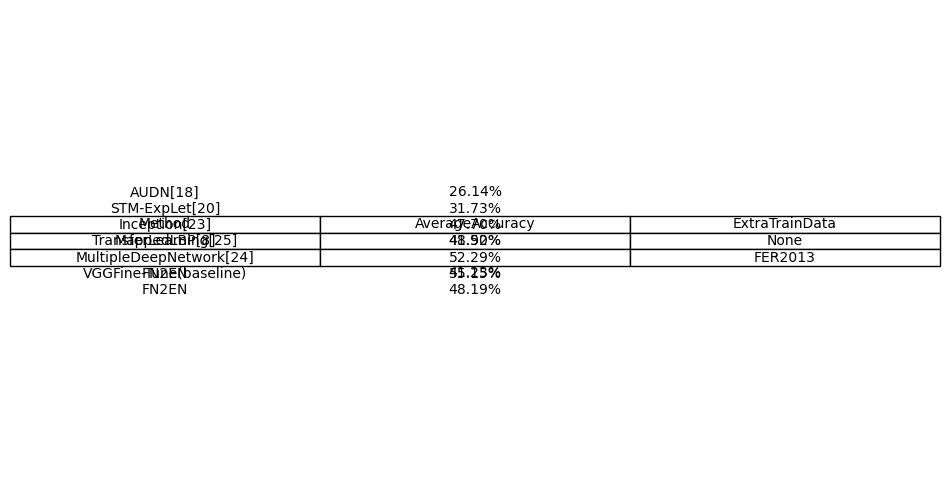

No tables found on page 8
Tables from page 1 of pdfs\arxiv_paper_112.pdf:
Empty DataFrame
Columns: [Ligang, Zhang1,, Brijesh, Verma1, , Dian, Tjondronegoro2 and, Vinod, Chandran3]
Index: []


IndexError: index 0 is out of bounds for axis 0 with size 0

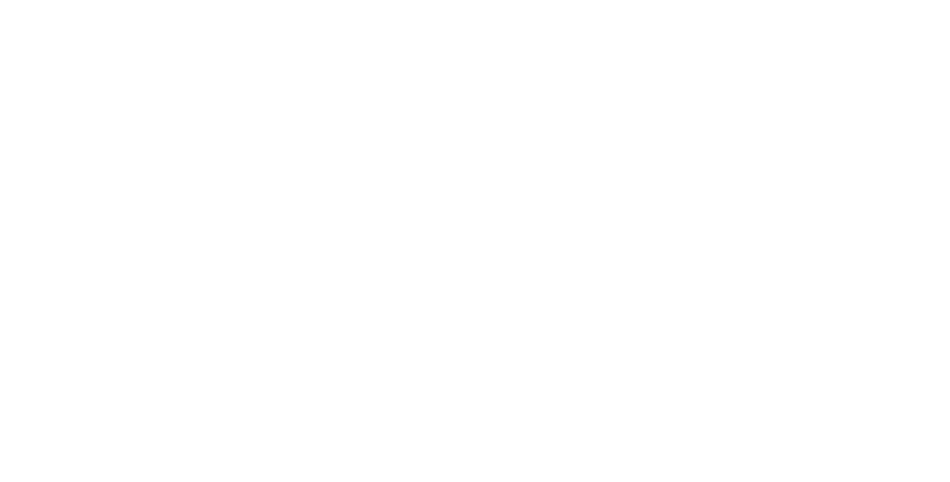

In [37]:
import pdfplumber
import os

pdf_folder='pdfs'
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt

# Function to extract tables from PDF using pdfplumber
def extract_tables_pdfplumber(pdf_file):
    with pdfplumber.open(pdf_file) as pdf:
        for page_number, page in enumerate(pdf.pages, start=1):
            tables = page.extract_tables()

            if tables:
                print(f"Tables from page {page_number} of {pdf_file}:")
                for table in tables:
                    # Convert the extracted table to a DataFrame
                    df = pd.DataFrame(table[1:], columns=table[0])
                    print(df)

                    # Plot the table using matplotlib's table functionality
                    fig, ax = plt.subplots(figsize=(12, 6))
                    ax.axis('tight')
                    ax.axis('off')
                    table_plot = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

                    plt.show()  # Show the plot

            else:
                print(f"No tables found on page {page_number}")

# Example: Extract tables from all PDFs in the folder
import os

for file_name in os.listdir(pdf_folder):
    if file_name.endswith(".pdf"):
        pdf_path = os.path.join(pdf_folder, file_name)
        extract_tables_pdfplumber(pdf_path)
